In [3]:
#Import the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,log_loss
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)


In [119]:
# #import dataset
# Use the absolute path to the CSV file
file_path = '/Users/saheedadeitan/Downloads/BusyQA_bootcamp//diabetes_risk_prediction_dataset.csv'
# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)
# Display the first few rows of the DataFrame to verify the import
df.describe()

,Age
count,520.000000
mean,48.028846
std,12.151466
min,16.000000
25%,39.000000
50%,47.500000
75%,57.000000
max,90.000000


In [121]:
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [122]:
# no of rows
print('Number of rows: ' + str(df.shape[0]))


Number of rows: 520


In [123]:
print('Number of columns: ' + str(len(df.columns)))
print('Columns in df: ' + str(df.columns))

Number of columns: 17
Columns in df: Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity', 'class'],
      dtype='object')


In [124]:
df.describe(include="O")

,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
count,520,520,520,520,520,520,520,520,520,520,520,520,520,520,520,520
unique,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,Male,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,Positive
freq,328,262,287,303,305,283,404,287,267,394,281,296,325,341,432,320


In [125]:
#Getting the data types of the dataset
df.dtypes

Age                    int64
Gender                object
Polyuria              object
Polydipsia            object
sudden weight loss    object
weakness              object
Polyphagia            object
Genital thrush        object
visual blurring       object
Itching               object
Irritability          object
delayed healing       object
partial paresis       object
muscle stiffness      object
Alopecia              object
Obesity               object
class                 object
dtype: object

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

In [127]:
#Finding out if there are Null values
null_counts = df.isna().sum()
null_counts

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

In [128]:
# total no of male and female with respective age
pd.crosstab(df.Gender, df.Age)

Age,16,25,26,27,28,29,30,31,32,33,...,65,66,67,68,69,70,72,79,85,90
Gender,,,,,,,,,,,,,,,,,,,,,
Female,0,1,0,0,6,0,6,2,1,2,...,4,1,0,7,5,0,0,0,0,2
Male,1,1,1,6,3,1,19,1,4,2,...,2,8,8,3,0,5,9,1,2,0


In [129]:
# total number of male and female with polyphagia
pd.crosstab(df.Gender, df.Polyphagia)

Polyphagia,No,Yes
Gender,,
Female,77,115
Male,206,122


In [100]:
# delayed healing # total number of male and female with polydipsia
pd.crosstab(df.Gender, df.Polydipsia)

Polydipsia,No,Yes
Gender,,
Female,67,125
Male,220,108


In [130]:
# total number of male and female with polyuria
pd.crosstab(df.Gender, df.Polyuria)

Polyuria,No,Yes
Gender,,
Female,63,129
Male,199,129


In [102]:
# total number of male and female with Obesity
pd.crosstab(df.Gender, df.Obesity)

Obesity,No,Yes
Gender,,
Female,159,33
Male,273,55


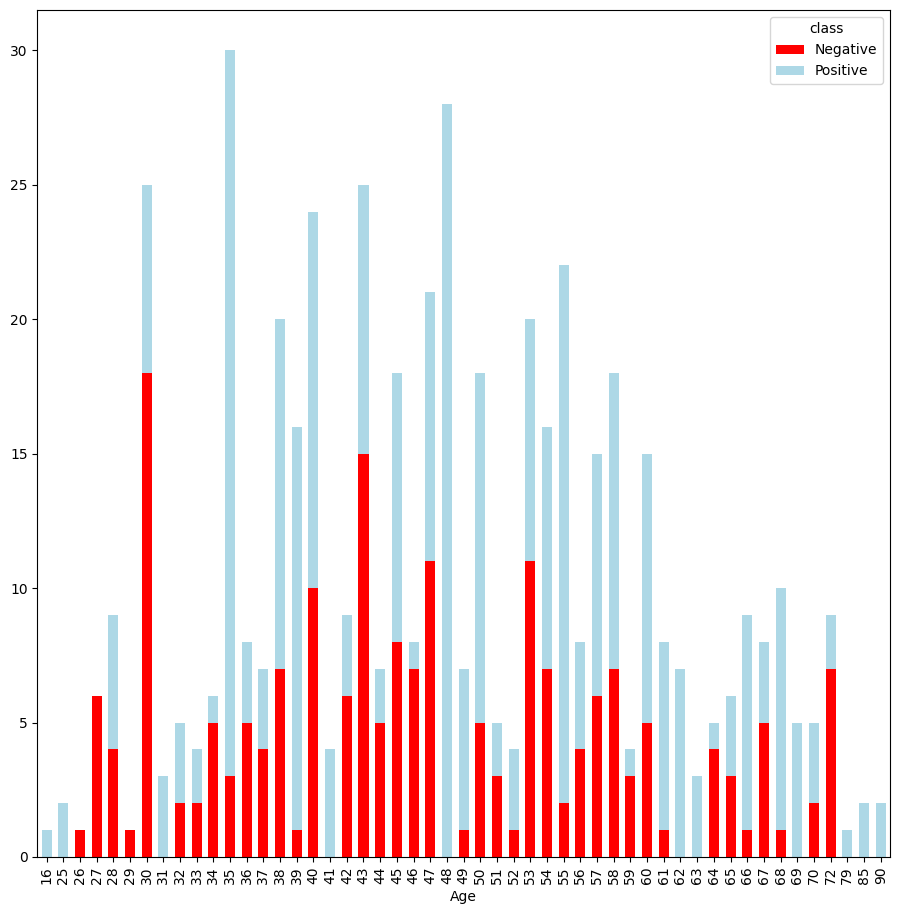

In [131]:
# # EDA i decided to use Bivariate analysis (categorical-categorical) to find the relationship between variables and their distribution. target variable "Class" 
# It shows the age categories of people with risk of having diabetes (positive) and since it does not really rely on numerical values, i deciddd to use Bivariate analysis
# And in this dataset, the only column that has numerical value is "Age"
# class vs Age
fig = pd.crosstab(df['Age'], df['class']).plot(kind='bar', stacked=True, width = 0.6, figsize = (11,11), color=['red','lightblue'])


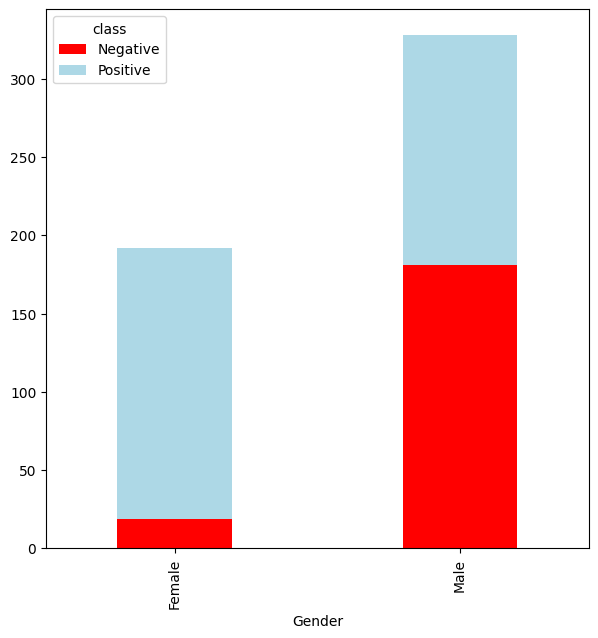

In [104]:

fig = pd.crosstab(df['Gender'], df['class']).plot(kind='bar', stacked=True, width = 0.4, figsize = (7,7), color=['red','lightblue'])

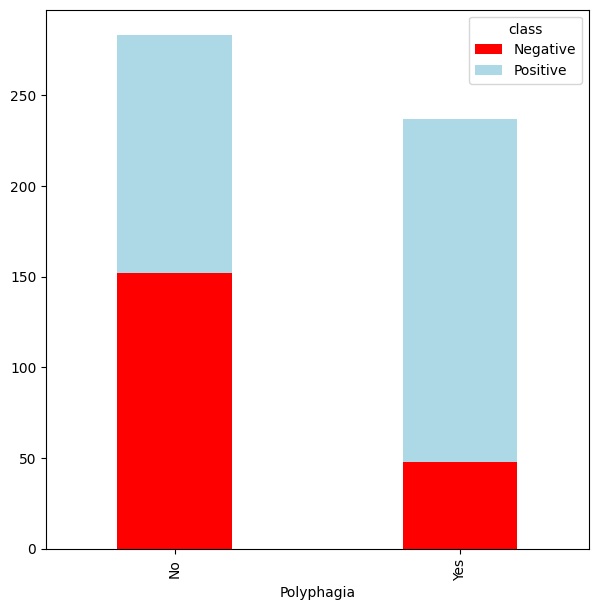

In [105]:
fig = pd.crosstab(df['Polyphagia'], df['class']).plot(kind='bar', stacked=True, width = 0.4, figsize = (7,7), color=['red','lightblue'])

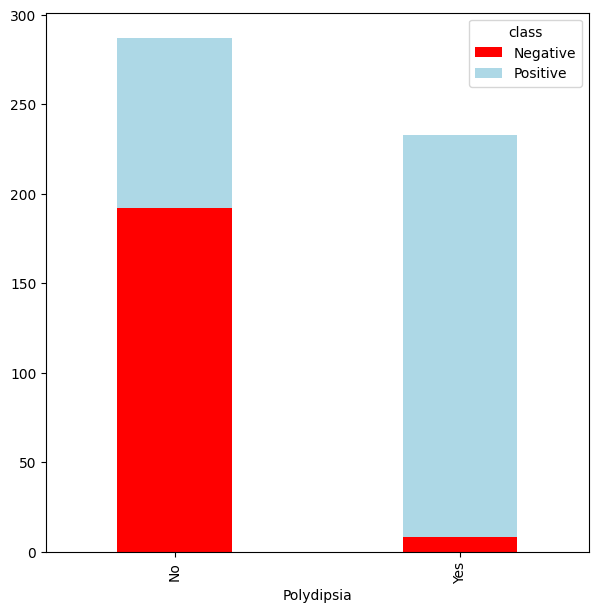

In [106]:
fig = pd.crosstab(df['Polydipsia'], df['class']).plot(kind='bar', stacked=True, width = 0.4, figsize = (7,7), color=['red','lightblue'])

In [108]:
# playing around with chi square
# using Chi Square for categorical valaubles, the critical values shows the relationship between gender and class. However the p values says no relationship between them.
# i keep getting error when i compare Gender with Age. TypeError: 'int' object is not subscriptable
#Contingency Table
# contingency_table = pd.crosstab(df['Gender'], df['class'])
# print('contingency_table :',contingency_table)
# print('\n')


# print("===================================================")

# #Observed Values
# Observed_Values = contingency_table.values 
# print("Observed Values :\n",Observed_Values)

# # print("==========================================================================")

# #Expected Values
# import scipy.stats
# b=scipy.stats.chi2_contingency(contingency_table)
# Expected_Values = b[3]
# print("\nExpected Values:\n ",Expected_Values)

# # print("==========================================================================")
# #Degree of Freedom
# no_of_rows=len(contingency_table.iloc[0:2,0])
# no_of_columns=len(contingency_table.iloc[0,0:2])
# df=(no_of_rows-1)*(no_of_columns-1)
# print("\nDegree of Freedom: ",df)

# print("==========================================================================")

# #Significance Level 5%
# alpha=0.05
# #chi-square statistic - χ2
# from scipy.stats import chi2
# chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
# chi_square_statistic=chi_square[0]+chi_square[1]
# print("\nchi-square statistic  :",chi_square_statistic)

# #critical_value
# critical_value=chi2.ppf(q=1-alpha,df=df)
# print('\ncritical_value        :',critical_value)

# print("==========================================================================")

# #p-value
# p_value=1-chi2.cdf(x=chi_square_statistic,df=df)
# # print(chi2.cdf(x=chi_square_statistic,df=df))
# print('\np-value               :',p_value)
# print('Significance level    :',alpha)
# print('Degree of Freedom     :',df)
# print('chi-square statistic  :',chi_square_statistic)
# print('critical_value        :',critical_value)
# print('p-value               :',p_value)

# print("===================================================")
# #compare chi_square_statistic with critical_value and p-value which is the probability of getting chi-square>0.09 (chi_square_statistic)
# if chi_square_statistic>=critical_value:
#     print("\n Critical_Value: Reject H0,There is a relationship between 2 categorical variables")
# else:
#     print("\n Critical_Value: Retain H0,There is no relationship between 2 categorical variables")
    
# if p_value<=alpha:
#     print("\n p-value       : Retain H0,There is no relationship between 2 categorical variables")
# else:
#     print("\n p-value       : Retain H0,There is no relationship between 2 categorical variables")


In [132]:
# # replacing values strings to integers, if i dont do it, my scaling result for x and y will give a Nan 
df.replace({"Yes": 1, "No": 0, "Positive": 1, "Negative": 0, "Male": 0, "Female": 1}, inplace=True)

df.replace

<bound method NDFrame.replace of      Age  Gender  Polyuria  Polydipsia  sudden weight loss  weakness  \
0     40       0         0           1                   0         1   
1     58       0         0           0                   0         1   
2     41       0         1           0                   0         1   
3     45       0         0           0                   1         1   
4     60       0         1           1                   1         1   
..   ...     ...       ...         ...                 ...       ...   
515   39       1         1           1                   1         0   
516   48       1         1           1                   1         1   
517   58       1         1           1                   1         1   
518   32       1         0           0                   0         1   
519   42       0         0           0                   0         0   

     Polyphagia  Genital thrush  visual blurring  Itching  Irritability  \
0             0            

In [133]:
# removing outlier , i keep getting an error. this is due to the fact that the dataset is mixture of stings and integers. Quamtile function works on numrical data.
# IQR is a measure of statistical dispersion, representing the range between the first quartile (Q1) and the third quartile (Q3) of the dataset.
# meaning i do not have to check for outliers
# The quantile function is expecting numeric data, but some of your columns contain string values.
# only foces on Age since it has large data set compared to the rest of the column
def remove_outlier(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    #Removing outliers
    df1 = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR)))]
    print(IQR)
    return df1

remove_outlier(df.Age)
df.Age = remove_outlier(df.Age)

18.0
18.0


In [134]:
df.Age.shape #only 4 ouliers were removed

(520,)

In [112]:
#splitting x and y variables
# Assuming 'x' is your feature matrix and 'y' is your target variable
X = df.iloc[:,:16] #he general syntax for iloc is df.iloc[row_index, column_index] for DataFrames and s.iloc[index] for Series, where row_index, column_index, and index are integer values.
y = df['class']


In [135]:
X.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
0,40.0,0,0,1,0,1,0,0,0,1,0,1,0,1,1,1
1,58.0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0
2,41.0,0,1,0,0,1,1,0,0,1,0,1,0,1,1,0
3,45.0,0,0,0,1,1,1,1,0,1,0,1,0,0,0,0
4,60.0,0,1,1,1,1,1,0,1,1,1,1,1,1,1,1


In [137]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: class, dtype: int64

In [115]:
# # scaling for categorically variable using One Hot Encoding
# # df = pd.DataFrame(data=df, columns=['y', 'dummy', 'x'])
# df = pd.get_dummies(df, columns = ['dummy'], drop_first = True)
# # to run the regression we want to get rid of the strings 'a', 'b', 'c' (obviously)
# # and we want to get rid of one dummy variable to avoid the dummy variable trap
# # arbitrarily chose "a", coefficients on "c" an "b" would show effect of "c" and "b"
# # relative to "a"
# df



In [139]:
# transformer = RobustScaler().fit(df[['class']])
# transformer.inverse_transform(df['class'])


In [ ]:
# i can do robust scale to reduce the effect of outliers
from sklearn.preprocessing import RobustScaler
transformer = RobustScaler().fit(df[['Age']])
df['Age'] = transformer.transform(df[['Age']])
df


,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,-0.416667,0,0,1,0,1,0,0,0,1,0,1,0,1,1,1,0.0
1,0.583333,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0.0
2,-0.361111,0,1,0,0,1,1,0,0,1,0,1,0,1,1,0,0.0
3,-0.138889,0,0,0,1,1,1,1,0,1,0,1,0,0,0,0,0.0
4,0.694444,0,1,1,1,1,1,0,1,1,1,1,1,1,1,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,-0.472222,1,1,1,1,0,1,0,0,1,0,1,1,0,0,0,0.0
516,0.027778,1,1,1,1,1,1,0,0,1,1,1,1,0,0,0,0.0
517,0.583333,1,1,1,1,1,1,0,1,0,0,0,1,1,0,1,0.0
518,-0.861111,1,0,0,0,1,0,0,1,1,0,1,0,0,1,0,-1.0


In [140]:
#train_test_split
from sklearn.model_selection import train_test_split
import pandas as pd 
# Assuming 'x' is your feature matrix and 'y' is your target variable
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(416, 16)
(416,)
(104, 16)
(104,)


In [141]:
x_test.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
422,67,0,0,1,0,1,1,0,1,0,1,1,1,1,1,1
107,47,0,1,0,1,1,1,0,0,0,0,1,1,1,0,0
253,43,1,1,1,1,1,1,0,1,0,0,0,1,1,0,1
235,26,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
311,60,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0


In [142]:
y_test.head()

422    1
107    1
253    1
235    0
311    0
Name: class, dtype: int64

In [143]:
y_train.value_counts()

class
1    256
0    160
Name: count, dtype: int64

In [155]:
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score

Accuracy  95.1923076923077
recall  0.96875
f1  0.9612403100775194
precision  0.9538461538461539


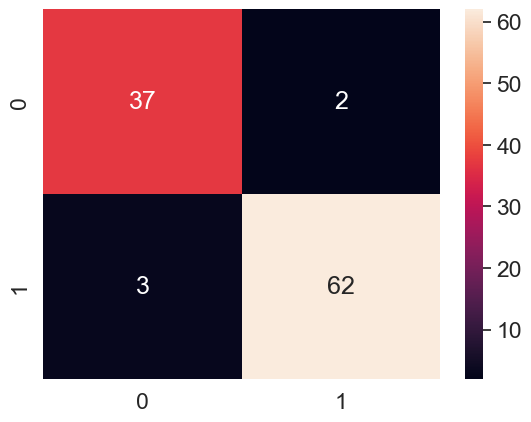

Accuracy: 0.9519230769230769

Precision: 0.9538461538461539

Recall: 0.96875

F1: 0.9612403100775194


In [159]:
#Model Logistics Regression Classifier
LR = LogisticRegression()

#fiting the model
LR.fit(x_train, y_train)

#prediction
y_pred = LR.predict(x_test)

#Accuracy
accuracy = LR.score(x_test, y_test)
print("Accuracy ", LR.score(x_test, y_test)*100)

# recall
recall = recall_score(y_test, y_pred)
print("recall ", recall_score(y_test, y_pred))

# F1
f1 = f1_score(y_test, y_pred)
print("f1 ",f1_score(y_test, y_pred) )

# Precision
precision = precision_score(y_test, y_pred)
print("precision ",precision_score(y_test, y_pred))

#Plot the confusion matrix
sns.set(font_scale=1.5)
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True, fmt='g')
plt.show()



# or
print(f"Accuracy: {accuracy}\n\nPrecision: {precision}\n\nRecall: {recall}\n\nF1: {f1}")

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Accuracy  94.23076923076923
recall  0.9375
f1  0.9523809523809523
precision  0.967741935483871


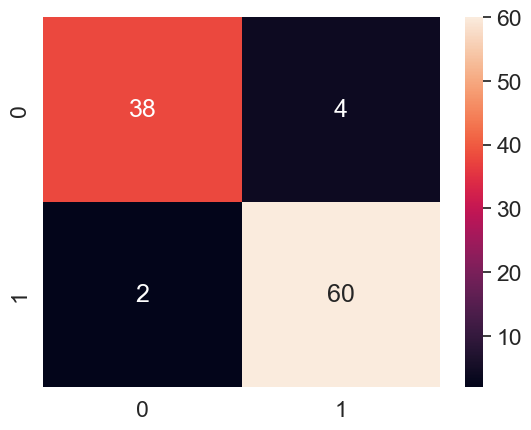

Accuracy: 0.9423076923076923

Precision: 0.967741935483871

Recall: 0.9375

F1: 0.9523809523809523


In [162]:
#Model Support Vector Classifier
SVC = LinearSVC()

#fiting the model
SVC.fit(x_train, y_train)

#prediction
y_pred = SVC.predict(x_test)

#Accuracy
accuracy = SVC.score(x_test, y_test)
print("Accuracy ", SVC.score(x_test, y_test)*100)

# recall
recall = recall_score(y_test, y_pred)
print("recall ", recall_score(y_test, y_pred))

# F1
f1 = f1_score(y_test, y_pred)
print("f1 ",f1_score(y_test, y_pred))

# Precision
precision = precision_score(y_test, y_pred)
print("precision ",precision_score(y_test, y_pred))

#Plot the confusion matrix
sns.set(font_scale=1.5)
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True, fmt='g')
plt.show()

# or
print(f"Accuracy: {accuracy}\n\nPrecision: {precision}\n\nRecall: {recall}\n\nF1: {f1}")

Accuracy  96.15384615384616
recall  0.953125
f1  0.9682539682539683
precision  0.9838709677419355


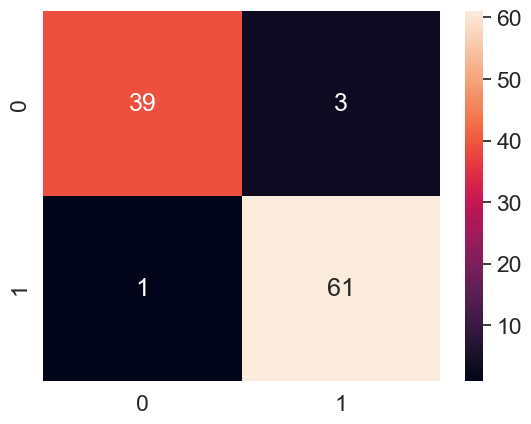

Accuracy: 0.9615384615384616

Precision: 0.9838709677419355

Recall: 0.953125

F1: 0.9682539682539683


In [177]:
#Model Decision Tree
DT = DecisionTreeClassifier(criterion= 'entropy',
                                           max_depth = 10, 
                                           splitter='best',
                                           random_state=0)

#fiting the model
DT.fit(x_train, y_train)

#prediction
y_pred = DT.predict(x_test)

#Accuracy
accuracy = DT.score(x_test, y_test)
print("Accuracy ", DT.score(x_test, y_test)*100)


# recall
recall = recall_score(y_test, y_pred)
print("recall ", recall_score(y_test, y_pred))

# F1
f1 = f1_score(y_test, y_pred)
print("f1 ",f1_score(y_test, y_pred) )

# Precision
precision = precision_score(y_test, y_pred)
print("precision ",precision_score(y_test, y_pred))


#Plot the confusion matrix
sns.set(font_scale=1.5)
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True, fmt='g')
plt.show()

print(f"Accuracy: {accuracy}\n\nPrecision: {precision}\n\nRecall: {recall}\n\nF1: {f1}")



Accuracy  99.03846153846155
recall  0.984375
f1  0.9921259842519685
precision  1.0


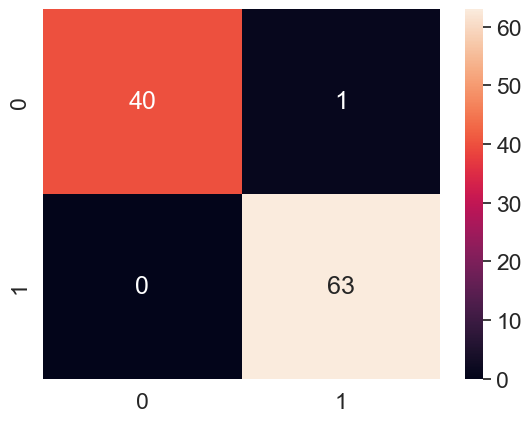

Accuracy: 0.9903846153846154

Precision: 1.0

Recall: 0.984375

F1: 0.9921259842519685


In [182]:
# #Model RandomForest
RF = RandomForestClassifier()

#fiting the model
RF.fit(x_train, y_train)

#prediction
prediction = y_pred 
y_pred = RF.predict(x_test)

#Accuracy
accuracy = RF.score(x_test, y_test)
print("Accuracy ", RF.score(x_test, y_test)*100)

# recall
recall = recall_score(y_test, y_pred)
print("recall ", recall_score(y_test, y_pred))

# F1
f1 = f1_score(y_test, y_pred)
print("f1 ",f1_score(y_test, y_pred))

# Precision
precision = precision_score(y_test, y_pred)
print("precision ",precision_score(y_test, y_pred))

#Plot the confusion matrix
sns.set(font_scale=1.5)
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True, fmt='g')
plt.show()

print(f"Accuracy: {accuracy}\n\nPrecision: {precision}\n\nRecall: {recall}\n\nF1: {f1}")

# or ROC (receiver operating characteristics) 
# ROC to evaluate classifer output, here AUC is 0.99, since it is close to 1.0, we can say it has a good meaure of seperability

# pre = pd.Series(prediction)
# y_test.replace(to_replace = 'true',value=1,inplace = True)
# y_test.replace(to_replace = 'fake',value= 0,inplace = True)
# pre.replace(to_replace = 'fake',value= 0,inplace = True,)
# pre.replace(to_replace = 'true',value= 1,inplace = True)

# import sklearn.metrics as metrics
# fpr, tpr, threshold = metrics.roc_curve(y_test, prediction)
# roc_auc = metrics.auc(fpr, tpr)
# print(roc_auc)

# import matplotlib.pyplot as plt
# plt.title('ROC Curve')
# plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
# plt.legend(loc = 'lower right')
# plt.plot([0, 1], [0, 1],'r--')
# plt.xlim([0, 1])
# plt.ylim([0, 1])
# plt.ylabel('True Positive Rate')
# plt.xlabel('False Positive Rate')
# plt.show()


In [ ]:
# Hyperparameter tuning

In [184]:
rf = RandomForestClassifier()
model = rf.fit(x_train, y_train)
prediction = model.predict(x_test)

In [186]:
#Grid Search
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based 
# parameter value can be used according to data understanding 
param_grid = {
    'bootstrap': [True],
    'max_depth': [3,4,5],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4],
    'min_samples_split': [8, 10],
    'n_estimators': [100,500, 1000]
}

# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)


# Fit the grid search to the data
grid_search.fit(x_train, y_train)

# Best parameters
grid_search.best_params_
# what i notice about grid_search is it takes time. so you shouldnt use it for large data set. 
# the critical features here is max_depth, max_feature, n_estimator

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[CV] END bootstrap=True, max_depth=3, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, max_depth=3, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, max_depth=3, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, max_depth=3, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=500; total time=   1.4s
[CV] END bootstrap=True, max_depth=3, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=500; total time=   1.4s
[CV] END bootstrap=True, max_depth=3, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=500; total time=   1.4s
[CV] END bootstrap=True, max_depth=3, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, max_depth=3, max_features=2, min_samples_leaf=3, m

{'bootstrap': True,
 'max_depth': 5,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 10,
 'n_estimators': 100}

In [ ]:
# or RandomSearch

In [187]:
#RandomSearch
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 100, num = 3)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(3, 6, num = 3)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [10, 55, 100], 'max_features': ['auto', 'sqrt'], 'max_depth': [3, 4, 6, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [188]:
# Use the random grid to search for best hyperparameters. this can be done on both large and small data.
# especially if you want a quick result.

# First create the base model to tune
rf = RandomForestClassifier()


# Random search of parameters, using 3 fold cross validation, 
# search across 10 different combinations(n_iter), and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)


# Fit the random search model
rf_random.fit(x_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=10; total tim

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:542: FitFailedWarning: 
171 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
154 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py", line 1344, in wrapper
    estimator._validate_params()
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.1

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [3, 4, 6, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 55, 100]},
                   random_state=42, verbose=2)

In [189]:
rf_random.best_params_

{'n_estimators': 55,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': None,
 'bootstrap': False}

In [ ]:
# from my analysis, my models are going to be close to accurate on dataset for male gender becuase it has been exposed to 
# that male valuables market compared to female gender.
# the critical features for both Grid search and Randomized are max_depth, max_feature, n_estimator